In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.p

AttributeError: _ARRAY_API not found

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### MNIST dataset

In [2]:
# Function to one-hot encode the target variable into the 10 classes (0-9)
# Input shape: (N,),    Output: (N, 10)
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [3]:
# Loading the MNIST dataset
train_data=pd.read_csv(r"./mnist_train.csv")
test_data=pd.read_csv(r"./mnist_test.csv")

# Preprocessing the data
train_data=train_data.to_numpy()    # train_data shape: (60000, 785)
test_data=test_data.to_numpy()      # test_data shape: (10000, 785)

X_train=train_data[:,1:]            # X_train shape: (60000, 784)
y_train=train_data[:,0]             # y_train shape: (60000,)
X_test=test_data[:,1:]              # X_test shape: (10000, 784)
y_test=test_data[:,0]               # y_test shape: (10000,)

X_train = X_train / 255.0           # Normalizing the data
X_test = X_test / 255.0

one_hot_y_train = one_hot(y_train)  # one_hot_y_train shape: (60000, 10)
one_hot_y_test = one_hot(y_test)    # one_hot_y_test shape: (10000, 10)

#### Training on the other Boolean functions

In [4]:
#all except majority function:won't converge without hidden layers
#Task 1
#XOR
x_xor=np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor=np.array([[0],[1],[1],[0]])


In [5]:
#DATASET FOR 4 INPUTS
x4=np.array([])
for i1 in range(0,2):
    for i2 in range(0,2):
        for i3 in range(0,2):
            for i4 in range(0,2):
                x4=np.append(x4,[i1,i2,i3,i4],axis=0)
x4=x4.reshape((16,4))

In [6]:
#dataset for 5 inputs
x5=np.array([])
for i1 in range(0,2):
    for i2 in range(0,2):
        for i3 in range(0,2):
            for i4 in range(0,2):
                for i5 in range(0,2):
                    x5=np.append(x5,[i1,i2,i3,i4,i5],axis=0)
x5=x5.reshape(32,5)

In [7]:
#dataset for palindrome detectiom on binary detection
y_p1=np.array([])
for x in x4:
    if x[0]==x[3] and x[1]==x[2]:
        y_p1=np.append(y_p1,[1])
    else:
        y_p1=np.append(y_p1,[0])
y_p2=np.array([])       
for x in x5:
    if x[0]==x[4] and x[1]==x[3]:
        y_p2=np.append(y_p2,[1])
    else:
        y_p2=np.append(y_p2,[0])
y_p1=y_p1.reshape(y_p1.shape[0],1)
y_p2=y_p2.reshape(y_p2.shape[0],1)  


In [8]:
#dataset for even parity function
y_e1=np.array([])
for x in x4:
    count=0
    for i in range(0,4):
        if x[i]==1:
            count+=1
    if count%2==0:
        y_e1=np.append(y_e1,[1])
    else:
        y_e1=np.append(y_e1,[0])
y_e2=np.array([])
for x in x5:
    count=0
    for i in range(0,5):
        if x[i]==1:
            count+=1
    if count%2==0:
        y_e2=np.append(y_e2,[1])
    else:
        y_e2=np.append(y_e2,[0])
y_e1=y_e1.reshape(y_e1.shape[0],1)
y_e2=y_e2.reshape(y_e2.shape[0],1)


In [9]:
#Task 2
class NeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.weights_input_hidden=np.random.randn(self.input_size,self.hidden_size)
        self.weights_hidden_output=np.random.randn(self.hidden_size,self.output_size)
        self.bias_hidden=np.zeros((1,self.hidden_size))
        self.bias_output=np.zeros((1,self.output_size))
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def sigmoid_derivative(self,x):
        return x*(1-x)
    def feedforward(self,x):
        self.hidden_activation=np.dot(x,self.weights_input_hidden)+self.bias_hidden
        self.hidden_output=self.sigmoid(self.hidden_activation)
        self.output_activation=np.dot(self.hidden_output,self.weights_hidden_output)+self.bias_output
        self.prediction_output=self.sigmoid(self.output_activation)
        return self.prediction_output
    def backward(self,x,y,lr):
        output_error=y-self.prediction_output
        output_delta=output_error*self.sigmoid_derivative(self.prediction_output)
        hidden_error=np.dot(output_delta,self.weights_hidden_output.T)                              
        hidden_delta=hidden_error*self.sigmoid_derivative(self.hidden_output)
        self.weights_hidden_output+=np.dot(self.hidden_output.T,output_delta)*lr
        self.bias_output+=np.sum(output_delta,axis=0,keepdims=True)*lr
        self.weights_input_hidden+=np.dot(x.T,hidden_delta)*lr
        self.bias_hidden+=np.sum(hidden_delta,axis=0,keepdims=True)*lr
    def train(self,x,y,epochs,lr):
        plot_arr=np.array([])
        for epoch in range(epochs):
            output=self.feedforward(x)
            self.backward(x,y,lr)
            if epoch%100000==0:
                loss=np.mean(np.square(y-output))
                plot_arr=np.append(plot_arr,[loss])
                print(f"Epochs:{epoch},Loss:{loss}")
            
        return plot_arr
        
                           

In [10]:
def plots_tss(plot_arr):
    m=len(plot_arr)
    x=np.arange(1,m+1)
    y=plot_arr
    plt.xlabel("epochs")
    plt.ylabel("tss_loss")
    plt.plot(x,y,label="loss versus epochs")
    plt.show()

Epochs:0,Loss:0.3417295844160175
Epochs:100000,Loss:0.0016695816468020337
Epochs:200000,Loss:0.0005954903226032781
Epochs:300000,Loss:0.00034983934698963945
Epochs:400000,Loss:0.0002444684040310435
Epochs:500000,Loss:0.0001866461266733676
Epochs:600000,Loss:0.00015035665303724123
Epochs:700000,Loss:0.0001255614632289804
Epochs:800000,Loss:0.00010759524934393946
Epochs:900000,Loss:9.400465249522513e-05
[[0.00840937]
 [0.99161446]
 [0.98979377]
 [0.00939777]]


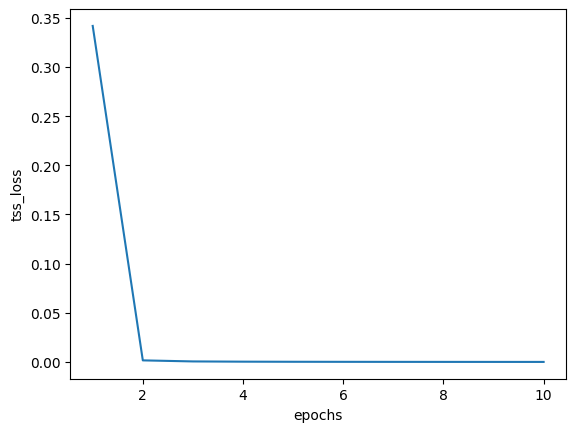

In [11]:
#XOR
nn=NeuralNetwork(2,4,1)
plot_xor_tss=nn.train(x_xor,y_xor,epochs=1000000,lr=0.01)
output_xor=nn.feedforward(x_xor)
print(output_xor)
plots_tss(plot_xor_tss)

Epochs:0,Loss:0.20528016009113226
Epochs:100000,Loss:0.0005615191877511048
Epochs:200000,Loss:0.00023197088057608188
Epochs:300000,Loss:0.00014319215067518952
Epochs:400000,Loss:0.0001027250402874569
Epochs:500000,Loss:7.975374442683764e-05
Epochs:600000,Loss:6.501244317841861e-05
Epochs:700000,Loss:5.4777617108949086e-05
Epochs:800000,Loss:4.7270371839072635e-05
Epochs:900000,Loss:4.1536006021810305e-05
[[9.93782354e-01]
 [5.36747778e-03]
 [6.41700462e-03]
 [4.15382314e-04]
 [6.64039147e-03]
 [6.70102514e-03]
 [9.93158689e-01]
 [5.81892518e-03]
 [5.73835133e-03]
 [9.89706809e-01]
 [6.35086774e-03]
 [4.28714598e-04]
 [5.86374107e-04]
 [5.95506027e-04]
 [6.14262964e-03]
 [9.90203674e-01]]


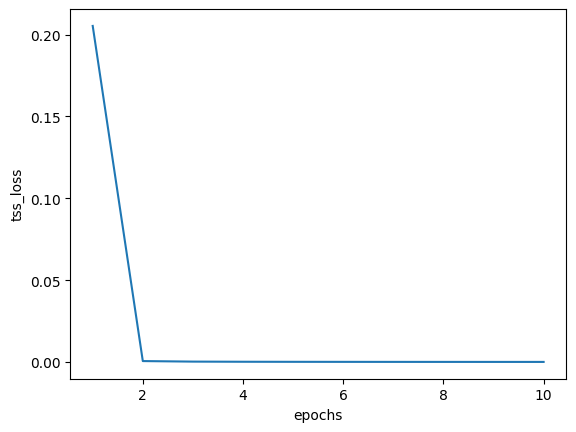

In [12]:
#Palindrome with 4 inputs
nn=NeuralNetwork(4,4,1)
plot_p1_tss=nn.train(x4,y_p1,epochs=1000000,lr=0.01)
output_p1=nn.feedforward(x4)
print(output_p1)
plots_tss(plot_p1_tss)

In [ ]:
#Palindrome with 5 inputs
nn=NeuralNetwork(5,4,1)
plot_p2_tss=nn.train(x5,y_p2,epochs=1000000,lr=0.01)
output_p2=nn.feedforward(x5)
print(output_p2)
plots_tss(plot_p2_tss)

Epochs:0,Loss:0.21637715047518796
Epochs:100000,Loss:0.00021013531097372758
Epochs:200000,Loss:9.215409233833064e-05
Epochs:300000,Loss:5.8011457319499236e-05


In [ ]:
#Even parity with 4 inputs
nn=NeuralNetwork(4,6,1)
plot_e1_tss=nn.train(x4,y_e1,epochs=1000000,lr=0.01)
output_e1=nn.feedforward(x4)
print(output_e1)
plots_tss(plot_e1_tss)

In [ ]:
#Even parity with 5 inputs
nn=NeuralNetwork(5,7,1)
plot_e2_tss=nn.train(x5,y_e2,epochs=1000000,lr=0.01)
output_e2=nn.feedforward(x5)
print(output_e2)
plots_tss(plot_e2_tss)

In [ ]:
#Task 2 :for cross entropy
class NeuralNetwork_CE:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.weights_input_hidden=np.random.randn(self.input_size,self.hidden_size)
        self.weights_hidden_output=np.random.randn(self.hidden_size,self.output_size)
        self.bias_hidden=np.zeros((1,self.hidden_size))
        self.bias_output=np.zeros((1,self.output_size))
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def sigmoid_derivative(self,x):
        return x*(1-x)
    def feedforward(self,x):
        self.hidden_activation=np.dot(x,self.weights_input_hidden)+self.bias_hidden
        self.hidden_output=self.sigmoid(self.hidden_activation)
        self.output_activation=np.dot(self.hidden_output,self.weights_hidden_output)+self.bias_output
        self.prediction_output=self.sigmoid(self.output_activation)
        return self.prediction_output
    def backward(self,x,y,lr):
        #output_error=(self.prediction_output-y)/((self.prediction_output)*(1-self.prediction_output))
        #output_delta=output_error*self.sigmoid_derivative(self.prediction_output)
        output_delta=y-self.prediction_output
        hidden_error=np.dot(output_delta,self.weights_hidden_output.T)                              
        hidden_delta=hidden_error*self.sigmoid_derivative(self.hidden_output)
        self.weights_hidden_output+=np.dot(self.hidden_output.T,output_delta)*lr
        self.bias_output+=np.sum(output_delta,axis=0,keepdims=True)*lr
        self.weights_input_hidden+=np.dot(x.T,hidden_delta)*lr
        self.bias_hidden+=np.sum(hidden_delta,axis=0,keepdims=True)*lr
    def train(self,x,y,epochs,lr):
        plot_arr=np.array([])
        for epoch in range(epochs):
            output=self.feedforward(x)
            self.backward(x,y,lr)
            if epoch%100000==0:
                loss=np.mean(np.square(y-output))
                plot_arr=np.append(plot_arr,[loss])
                print(f"Epochs:{epoch},Loss:{loss}")
        return plot_arr
            
        
        
                           

In [ ]:
def plots_ce(plot_arr):
    m=len(plot_arr)
    x=np.arange(1,m+1)
    y=plot_arr
    plt.xlabel("epochs")
    plt.ylabel("ce_loss")
    plt.plot(x,y,label="loss versus epochs")
    plt.show()

In [ ]:
#XOR
nn=NeuralNetwork_CE(2,4,1)
plot_xor_ce=nn.train(x_xor,y_xor,epochs=1000000,lr=0.01)
output_xor_ce=nn.feedforward(x_xor)
print(output_xor_ce)
plots_ce(plot_xor_ce)


In [ ]:
#Palindrome with 4 inputs
nn=NeuralNetwork_CE(4,4,1)
plot_p1_ce=nn.train(x4,y_p1,epochs=1000000,lr=0.01)
output_p1_ce=nn.feedforward(x4)
print(output_p1_ce)
plots_ce(plot_p1_ce)


In [ ]:
#Palindrome with 5 inputs
nn=NeuralNetwork_CE(5,4,1)
plot_p2_ce=nn.train(x5,y_p2,epochs=1000000,lr=0.01)
output_p2_ce=nn.feedforward(x5)
print(output_p2_ce)
plots_ce(plot_p2_ce)

In [ ]:
#Even parity with 4 inputs
nn=NeuralNetwork_CE(4,6,1)
plot_e1_ce=nn.train(x4,y_e1,epochs=1000000,lr=0.01)
output_e1_ce=nn.feedforward(x4)
print(output_e1_ce)
plots_ce(plot_e1_ce)

In [ ]:
#Even parity with 5 inputs
nn=NeuralNetwork_CE(5,7,1)
plot_p2_ce=nn.train(x5,y_e2,epochs=1000000,lr=0.01)
output_e2_ce=nn.feedforward(x5)
print(output_e2_ce)
plots_ce(plot_p2_ce)

In [ ]:
#MNIST with CE loss with hidden layer using ReLU

#Task 2 :for cross entropy
class NeuralNetwork_CE:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.weights_input_hidden=np.random.randn(self.input_size,self.hidden_size)
        self.weights_hidden_output=np.random.randn(self.hidden_size,self.output_size)
        self.bias_hidden=np.zeros((1,self.hidden_size))
        self.bias_output=np.zeros((1,self.output_size))
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def sigmoid_derivative(self,x):
        return x*(1-x)
    def softmax(self,x):
        exp_x=np.exp(x-np.max(x,axis=1,keepdims=True))
        return exp_x/np.sum(exp_x,axis=1,keepdims=True)
    def relu(self,x):
        return np.maximum(0,x)
    def relu_derivative(self,x):
        if x>0:
            return 1
        return 0
    def feedforward(self,x):
        self.hidden_activation=np.dot(x,self.weights_input_hidden)+self.bias_hidden
        self.hidden_output=self.relu(self.hidden_activation)
        self.output_activation=np.dot(self.hidden_output,self.weights_hidden_output)+self.bias_output
        self.prediction_output=self.softmax(self.output_activation)
        return self.prediction_output
    def backward(self,x,y,lr):
        #output_error=(self.prediction_output-y)/((self.prediction_output)*(1-self.prediction_output))
        #output_delta=output_error*self.sigmoid_derivative(self.prediction_output)
        output_delta=y-self.prediction_output
        hidden_error=np.dot(output_delta,self.weights_hidden_output.T)                              
        hidden_delta=hidden_error*self.relu_derivative(self.hidden_output)
        self.weights_hidden_output+=np.dot(self.hidden_output.T,output_delta)*lr
        self.bias_output+=np.sum(output_delta,axis=0,keepdims=True)*lr
        self.weights_input_hidden+=np.dot(x.T,hidden_delta)*lr
        self.bias_hidden+=np.sum(hidden_delta,axis=0,keepdims=True)*lr
    def train(self,x,y,epochs,lr):
        plot_arr=np.array([])
        for epoch in range(epochs):
            output=self.feedforward(x)
            self.backward(x,y,lr)
            if epoch%100000==0:
                loss=np.mean(np.square(y-output))
                plot_arr=np.append(plot_arr,[loss])
                print(f"Epochs:{epoch},Loss:{loss}")
        return plot_arr
            
        
        
                           


In [ ]:
#MNIST
nn=NeuralNetwork_CE(784,7,10)
plot_mnist_ce=nn.train(X_train,one_hot_y_train,epochs=1000000,lr=0.01)
output_mnist_ce=nn.feedforward(X_train)
print(output_mnist_ce)
plots_ce(plot_mnist_ce)

In [ ]:
def accuracy(